# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [186]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [192]:
sinasc_raw.groupby(by='munResNome')[['IDADEMAE', 
                                     'IDADEPAI']].agg({'IDADEMAE':[('Média','mean')],
                                                       'IDADEPAI':[('Média','mean')]})

,IDADEMAE,IDADEPAI
,Média,Média
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [194]:
sinasc_raw.DTNASC = pd.to_datetime(sinasc_raw.DTNASC)
sinasc_raw.DTNASC

0       2019-02-19
1       2019-02-21
2       2019-02-25
3       2019-03-20
4       2019-03-23
           ...    
27023   2019-12-13
27024   2019-10-04
27025   2019-08-02
27026   2019-12-23
27027   2019-12-27
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

In [195]:
sinasc_aniversario = sinasc_raw[(sinasc_raw.DTNASC.dt.day == 15) & 
                                (sinasc_raw.DTNASC.dt.month == 7)]

print('Em 2019, dos {} nascimentos registrados no Estado de Rondônia, {} ocorreram no dia 15 de Julho.'.format(
    len(sinasc_raw), 
    len(sinasc_aniversario)
))

sinasc_aniversario = sinasc_aniversario.groupby(by=['DTNASC',
                                                    'SEXO',
                                                    'ESCMAE'])['PESO'].mean()

sinasc_aniversario = sinasc_aniversario.to_frame()

sinasc_aniversario

Em 2019, dos 27028 nascimentos registrados no Estado de Rondônia, 81 ocorreram no dia 15 de Julho.


PESO
DTNASC     SEXO      ESCMAE                      
2019-07-15 Feminino  1 a 3 anos       3320.000000
                     12 anos ou mais  3454.444444
                     4 a 7 anos       2641.888889
                     8 a 11 anos      3186.904762
           Masculino 12 anos ou mais  3201.363636
                     4 a 7 anos       3466.363636
                     8 a 11 anos      3610.526316

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [201]:
print('Municípios em que nasceram menos bebês:\n')
print(sinasc_raw.munResNome.value_counts().sort_values().head())

sinasc_raw['COUNT'] = 1
sinasc_3 = sinasc_raw.groupby(by='munResNome')[['COUNT', 
                                                'IDADEMAE',
                                                'IDADEPAI']].agg(
    {'COUNT':[('Quantidade de bebês nascidos','count')], 
     'IDADEMAE':[('idade média','mean'), 
                 ('idade máxima',max), 
                 ('idade mínima',min)], 
     'IDADEPAI':[('idade média','mean'), 
                 ('idade máxima',max), 
                 ('idade mínima',min)]})

sinasc_3.sort_values(('COUNT', 'Quantidade de bebês nascidos'))

Municípios em que nasceram menos bebês:

munResNome
Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_14452\2637690797.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  'IDADEPAI']].agg(
C:\Users\User\AppData\Local\Temp\ipykernel_14452\2637690797.py:7: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  'IDADEPAI']].agg(


COUNT    IDADEMAE  \
                          Quantidade de bebês nascidos idade média   
munResNome                                                           
Município ignorado - RO                              1   24.000000   
Castanheiras                                        32   27.281250   
Pimenteiras do Oeste                                40   25.075000   
Primavera de Rondônia                               43   27.023256   
Parecis                                             44   26.454545   
Rio Crespo                                          50   26.660000   
São Felipe D'Oeste                                  54   26.481481   
Teixeirópolis                                       64   26.031250   
Cacaulândia                                         75   25.546667   
Cabixi                                              80   26.037500   
Vale do Paraíso                                     81   25.679012   
Ministro Andreazza                                  84   27.904762   
Vale do Anari                                       93   26.096774   
Theobroma                                           97   25.536082   
Novo Horizonte do Oeste                             98   26.938776   
Santa Luzia D'Oeste                                 99   26.121212   
Nova União                                         104   26.894231   
Itapuã do Oeste                                    109   26.064220   
Governador Jorge Teixeira                          112   24.401786   
Corumbiara                                         127   24.716535   
Alto Alegre dos Parecis                            154   24.844156   
Chupinguaia                                        162   25.333333   
Mirante da Serra                                   164   26.304878   
Campo Novo de Rondônia                             166   24.825301   
Seringueiras                                       168   24.910714   
Urupá                                              170   26.688235   
Monte Negro                                        199   25.648241   
Cujubim                                            205   24.482927   
Alvorada D'Oeste                                   205   25.770732   
Colorado do Oeste                                  214   27.602804   
Alto Paraíso                                       226   24.960177   
Costa Marques                                      233   24.412017   
Cerejeiras                                         237   27.240506   
Nova Brasilândia D'Oeste                           261   26.222222   
São Francisco do Guaporé                           303   25.660066   
Presidente Médici                                  304   25.796053   
Candeias do Jamari                                 337   25.243323   
São Miguel do Guaporé                              353   25.926346   
Alta Floresta D'Oeste                              367   25.991826   
Nova Mamoré                                        432   25.326389   
Espigão D'Oeste                                    450   26.093333   
Machadinho D'Oeste                                 500   25.480000   
Buritis                                            583   25.559177   
Pimenta Bueno                                      616   25.199675   
Ouro Preto do Oeste                                631   26.375594   
Guajará-Mirim                                      781   25.462228   
Jaru                                               881   25.982974   
Rolim de Moura                                     927   26.600863   
Cacoal                                            1374   26.890102   
Vilhena                                           1590   26.433962   
Ariquemes                                         1729   25.607866   
Ji-Paraná                                         2182   26.361137   
Porto Velho                                       8437   26.312670   

                                                       IDADEPAI               \
                          idade máxima idade mín

In [202]:
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,COUNT
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,1
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,1
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,1
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,1
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,1


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [205]:
#Qual o municipio que nasceu mais bebe no mês de março?
sinasc_mar = sinasc_raw[sinasc_raw.DTNASC.dt.month == 3].copy()

print('O município que mais nasceu bebê no mês de março foi {} com {} nascimentos.'.format(
    sinasc_mar['munResNome'].value_counts().index[0], 
    sinasc_mar['munResNome'].value_counts().values[0]))


O município que mais nasceu bebê no mês de março foi Porto Velho com 744 nascimentos.


In [206]:
#- qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
#- qual a idade media, maxima, minima dos pais nesse municipio?
sinasc_mar['MES'] = sinasc_mar['DTNASC'].dt.month_name()
sinasc_mar['COUNT'] = 1
sinasc_4 = sinasc_mar.groupby(by=['MES',
                                  'munResNome']
                             )[['COUNT', 
                                'QTDFILVIVO',
                                'IDADEMAE',
                                'IDADEPAI']
                              ].agg({'COUNT':[('Qtd de bebês nascidos','count')], 
                                     'QTDFILVIVO':[('Média','mean'), 
                                                   ('Máx',max), 
                                                   ('Mín',min)], 
                                     'IDADEMAE':[('Média','mean'), 
                                                 ('Máx',max), 
                                                 ('Mín',min), 
                                                 ('Amplitude',lambda x: x.max()-x.min())], 
                                     'IDADEPAI':[('Média','mean'), 
                                                 ('Máx',max), 
                                                 ('Mín',min), 
                                                 ('Amplitude',lambda x: x.max()-x.min())]
                                    })

sinasc_4['Diferença da média IDADEPAI-IDADEMAE'] = sinasc_4[('IDADEPAI','Média')]-sinasc_4[('IDADEMAE','Média')]
sinasc_4.sort_values(('COUNT', 'Qtd de bebês nascidos'), 
                     ascending=False
                    )

C:\Users\User\AppData\Local\Temp\ipykernel_14452\2581789427.py:11: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ].agg({'COUNT':[('Qtd de bebês nascidos','count')],
C:\Users\User\AppData\Local\Temp\ipykernel_14452\2581789427.py:11: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ].agg({'COUNT':[('Qtd de bebês nascidos','count')],


COUNT QTDFILVIVO            \
                                Qtd de bebês nascidos      Média  Máx  Mín   
MES   munResNome                                                             
March Porto Velho                                 744   1.295056  9.0  0.0   
      Ji-Paraná                                   188   0.828877  4.0  0.0   
      Vilhena                                     148   0.979592  5.0  0.0   
      Ariquemes                                   141   1.064748  4.0  0.0   
      Cacoal                                      133   0.969697  7.0  0.0   
      Jaru                                         80   1.025641  5.0  0.0   
      Guajará-Mirim                                75   1.534247  8.0  0.0   
      Rolim de Moura                               69   0.724638  5.0  0.0   
      Ouro Preto do Oeste                          67   1.014925  5.0  0.0   
      Pimenta Bueno                                62   0.836066  4.0  0.0   
      Buritis                                      59   1.421053  4.0  0.0   
      Nova Mamoré                                  53   1.360000  6.0  0.0   
      Espigão D'Oeste                              44   1.386364  6.0  0.0   
      Machadinho D'Oeste                           44   1.000000  6.0  0.0   
      São Miguel do Guaporé                        41   1.000000  4.0  0.0   
      Candeias do Jamari                           33   1.250000  4.0  0.0   
      São Francisco do Guaporé                     31   1.161290  6.0  0.0   
      Alta Floresta D'Oeste                        31   0.903226  4.0  0.0   
      Presidente Médici                            29   0.724138  3.0  0.0   
      Costa Marques                                24   1.208333  4.0  0.0   
      Alvorada D'Oeste                             22   1.000000  3.0  0.0   
      Alto Paraíso                                 22   1.285714  3.0  0.0   
      Monte Negro                                  20   0.700000  3.0  0.0   
      Nova Brasilândia D'Oeste                     20   0.947368  3.0  0.0   
      Colorado do Oeste                            19   1.000000  4.0  0.0   
      Seringueiras                                 19   1.000000  2.0  0.0   
      Chupinguaia                                  18   1.055556  4.0  0.0   
      Cujubim                                      17   1.294118  5.0  0.0   
      Cerejeiras                                   16   0.875000  2.0  0.0   
      Urupá                                        14   0.928571  2.0  0.0   
      Vale do Paraíso                              13   0.583333  2.0  0.0   
      Campo Novo de Rondônia                       13   1.285714  2.0  0.0   
      Corumbiara                                   12   0.909091  3.0  0.0   
      Vale do Anari                                11   0.818182  2.0  0.0   
      Alto Alegre dos Parecis                      10   0.888889  2.0  0.0   
      Governador Jorge Teixeira                    10   0.555556  2.0  0.0   
      Cacaulândia                                  10   1.200000  4.0  0.0   
      Rio Crespo                                    9   1.000000  3.0  0.0   
      Mirante da Serra                              9   1.000000  2.0  0.0   
      Theobroma                                     8   1.125000  2.0  0.0   
      Itapuã do Oeste                               8   1.285714  3.0  0.0   
      Santa Luzia D'Oeste                           7   0.428571  2.0  0.0   
      Nova União                                    7   0.571429  1.0  0.0   
      Cabixi                                        6   0.833333  3.0  0.0   
      Parecis                                       6   1.833333  5.0  1.0   
      Ministro Andreazza                            6   1.166667  3.0  0.0   
      Pimenteiras do Oeste                          6   1.000000  2.0  0.0   
      Primavera de Rondônia                         5   1.200000  2.0  0.0   
      São Felipe D'Oeste                            5   0.000000  0.0 

In [208]:
#Consultando o índice por linhas
sinasc_4.index

MultiIndex([('March',     'Alta Floresta D'Oeste'),
            ('March',   'Alto Alegre dos Parecis'),
            ('March',              'Alto Paraíso'),
            ('March',          'Alvorada D'Oeste'),
            ('March',                 'Ariquemes'),
            ('March',                   'Buritis'),
            ('March',                    'Cabixi'),
            ('March',               'Cacaulândia'),
            ('March',                    'Cacoal'),
            ('March',    'Campo Novo de Rondônia'),
            ('March',        'Candeias do Jamari'),
            ('March',              'Castanheiras'),
            ('March',                'Cerejeiras'),
            ('March',               'Chupinguaia'),
            ('March',         'Colorado do Oeste'),
            ('March',                'Corumbiara'),
            ('March',             'Costa Marques'),
            ('March',                   'Cujubim'),
            ('March',           'Espigão D'Oeste'),
            

In [210]:
#Valores do município Porto Velho
sinasc_4.loc['March',               'Porto Velho']

COUNT                                 Qtd de bebês nascidos    744.000000
QTDFILVIVO                            Média                      1.295056
                                      Máx                        9.000000
                                      Mín                        0.000000
IDADEMAE                              Média                     26.596774
                                      Máx                       44.000000
                                      Mín                       14.000000
                                      Amplitude                 30.000000
IDADEPAI                              Média                     34.629032
                                      Máx                       62.000000
                                      Mín                       19.000000
                                      Amplitude                 43.000000
Diferença da média IDADEPAI-IDADEMAE                             8.032258
Name: (March, Porto Velho), dtype: flo

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

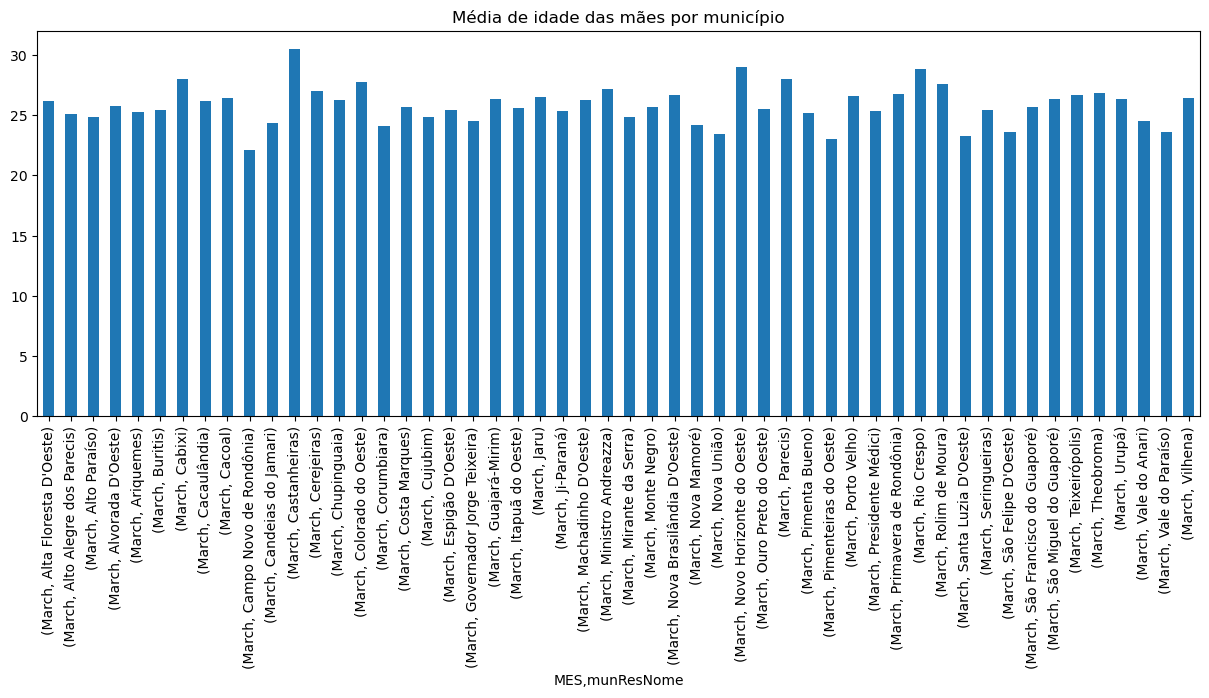

In [215]:
#média da idade das mães por município:
sinasc_4[('IDADEMAE', 'Média')].plot(kind='bar', figsize=[15, 5], title="Média de idade das mães por município")
plt.show()



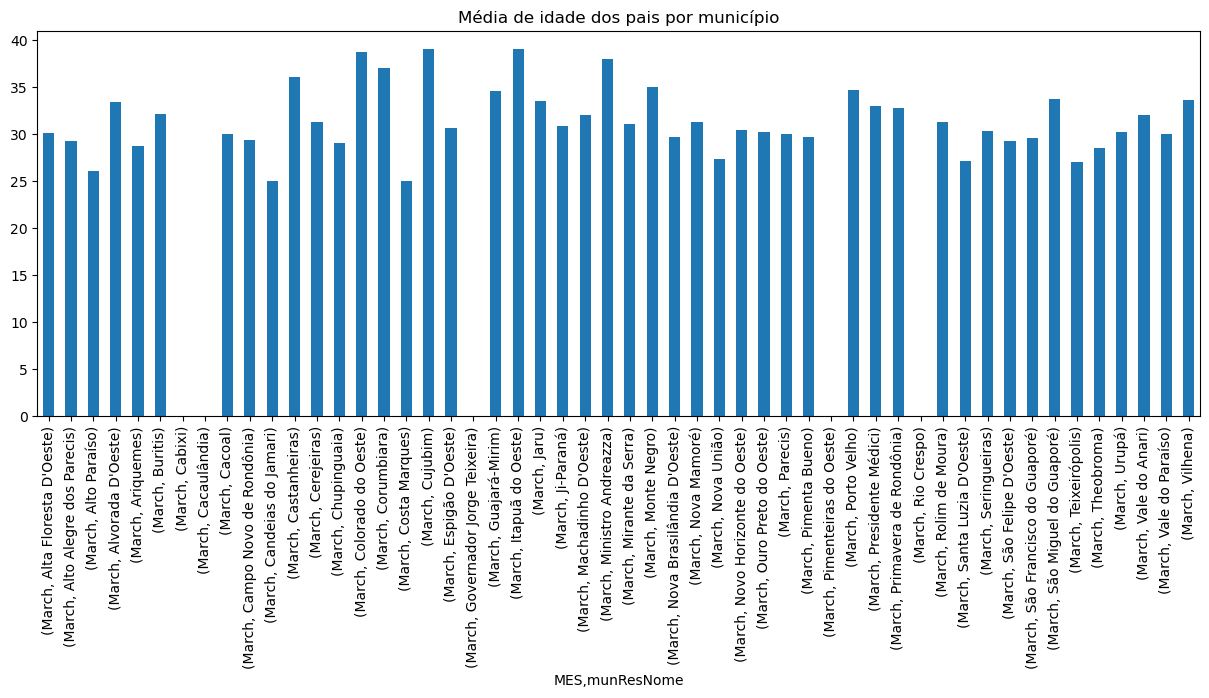

In [217]:
#média da idade dos pais por município:
sinasc_4[('IDADEPAI','Média')].plot(kind='bar', figsize=[15, 5], title="Média de idade dos pais por município")
plt.show()

As idades médias dos Pais se mostram aproximadamente 10 anos acima da idade média das mães, além de mostrar uma variação maior entre os municípios
em comparação com a idade média das mães.

In [219]:
#combinando dois níveis de rótulos das colunas em uma única string, para failitar o acesso às colunas no futuro.
sinasc_4.columns = ['_'.join(col).strip() for col in sinasc_4.columns.values]
sinasc_4

COUNT_Qtd de bebês nascidos  \
MES   munResNome                                               
March Alta Floresta D'Oeste                               31   
      Alto Alegre dos Parecis                             10   
      Alto Paraíso                                        22   
      Alvorada D'Oeste                                    22   
      Ariquemes                                          141   
      Buritis                                             59   
      Cabixi                                               6   
      Cacaulândia                                         10   
      Cacoal                                             133   
      Campo Novo de Rondônia                              13   
      Candeias do Jamari                                  33   
      Castanheiras                                         4   
      Cerejeiras                                          16   
      Chupinguaia                                         18   
      Colorado do Oeste                                   19   
      Corumbiara                                          12   
      Costa Marques                                       24   
      Cujubim                                             17   
      Espigão D'Oeste                                     44   
      Governador Jorge Teixeira                           10   
      Guajará-Mirim                                       75   
      Itapuã do Oeste                                      8   
      Jaru                                                80   
      Ji-Paraná                                          188   
      Machadinho D'Oeste                                  44   
      Ministro Andreazza                                   6   
      Mirante da Serra                                     9   
      Monte Negro                                         20   
      Nova Brasilândia D'Oeste                            20   
      Nova Mamoré                                         53   
      Nova União                                           7   
      Novo Horizonte do Oeste                              5   
      Ouro Preto do Oeste                                 67   
      Parecis                                              6   
      Pimenta Bueno                                       62   
      Pimenteiras do Oeste                                 6   
      Porto Velho                                        744   
      Presidente Médici                                   29   
      Primavera de Rondônia                                5   
      Rio Crespo                                           9   
      Rolim de Moura                                      69   
      Santa Luzia D'Oeste                                  7   
      Seringueiras                                        19   
      São Felipe D'Oeste                                   5   
      São Francisco do Guaporé                            31   
      São Miguel do Guaporé                               41   
      Teixeirópolis                                        3   
      Theobroma                                            8   
      Urupá                                               14   
      Vale do Anari                                       11   
      Vale do Paraíso                                     13   
      Vilhena                                            148   

                                 QTDFILVIVO_Média  QTDFILVIVO_Máx  \
MES   munResNome                                                    
March Alta Floresta D'Oeste              0.903226             4.0   
      Alto Alegre dos Parecis            0.888889             2.0   
      Alto Paraíso                       1.285714             3.0   
      Alvorada D'Oeste                   1.000000             3.0   
      Ariquemes                          1.064748             4.0   
      Buritis                            1.421053             4.0   
      Cabixi            

In [221]:
print('Mediana de todos os municípios no mês de março:')
round(sinasc_4.groupby(by='MES').median())

Mediana de todos os municípios no mês de março:


,COUNT_Qtd de bebês nascidos,QTDFILVIVO_Média,QTDFILVIVO_Máx,QTDFILVIVO_Mín,IDADEMAE_Média,IDADEMAE_Máx,IDADEMAE_Mín,IDADEMAE_Amplitude,IDADEPAI_Média,IDADEPAI_Máx,IDADEPAI_Mín,IDADEPAI_Amplitude,Diferença da média IDADEPAI-IDADEMAE_
MES,,,,,,,,,,,,,
March,18.0,1.0,3.0,0.0,26.0,37.0,16.0,21.0,31.0,40.0,24.0,17.0,5.0


In [222]:
print('Média de todos os municípios no mês de março:')
round(sinasc_4.groupby(by='MES').mean())

Média de todos os municípios no mês de março:


,COUNT_Qtd de bebês nascidos,QTDFILVIVO_Média,QTDFILVIVO_Máx,QTDFILVIVO_Mín,IDADEMAE_Média,IDADEMAE_Máx,IDADEMAE_Mín,IDADEMAE_Amplitude,IDADEPAI_Média,IDADEPAI_Máx,IDADEPAI_Mín,IDADEPAI_Amplitude,Diferença da média IDADEPAI-IDADEMAE_
MES,,,,,,,,,,,,,
March,47.0,1.0,4.0,0.0,26.0,37.0,17.0,21.0,31.0,41.0,24.0,17.0,6.0


A média e mediana de quantidade de filhos vivos permanece em 1.